In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn import metrics
import random


In [2]:
data_1 = pd.read_csv("D:\CS5691 PRML\Data contest\Dataset_1_Training.csv")
test_set_1 = pd.read_csv("D:\CS5691 PRML\Data contest\Dataset_1_Testing.csv")
train=data_1.set_index('ID_REF').T
test=test_set_1.set_index('ID_REF').T
train_1=train.drop(["CO: 1","CO: 2"], axis=1)
labels_1 = train["CO: 1"]
labels_2 = train["CO: 2"]

In [3]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(train_1)
train_1 = scaler.transform(train_1)

In [4]:
from sklearn.model_selection import train_test_split
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(train_1, labels_1, test_size=0.2, random_state=1, stratify=labels_1)

In [5]:
one = train.loc[train['CO: 1']==1]
one.sort_values(['gene_1'],ascending=[0])


ID_REF,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_22276,gene_22277,gene_22278,gene_22279,gene_22280,gene_22281,gene_22282,gene_22283,CO: 1,CO: 2
Train_56,13.2494,8.3434,8.0536,10.0269,6.5806,8.9744,8.1692,6.9459,6.6733,6.3809,...,15.9358,15.4296,3.0700,5.0445,3.2727,4.1660,3.4791,2.7448,1.0,1.0
Train_29,12.8908,8.0940,9.3695,10.7094,3.5129,9.2820,7.1841,7.1036,10.6763,6.2550,...,15.7918,15.5614,3.9990,2.7191,6.0254,3.5314,5.1805,3.4860,1.0,0.0
Train_89,12.8251,8.0386,7.8439,10.2954,7.4171,8.5503,7.1581,6.4277,7.5333,4.5061,...,16.0691,15.6316,3.8866,4.7020,3.1636,3.5443,4.5771,6.4826,1.0,0.0
Train_54,12.7472,9.0996,7.3965,10.1024,5.4298,9.1688,6.7770,7.0498,8.5157,6.7085,...,15.2835,15.2522,3.1348,3.1757,5.2437,4.5643,3.2974,2.9462,1.0,0.0
Train_46,12.7443,8.4647,7.8223,10.5702,5.4462,9.6306,7.9954,5.0945,9.2264,5.9951,...,15.3389,15.1506,4.4074,3.8410,5.4803,1.4006,3.8577,3.0052,1.0,0.0
Train_14,12.5807,8.0104,7.5885,10.1383,6.7935,9.2063,8.0392,5.0627,8.2889,6.2767,...,16.1373,15.8473,3.0491,3.2856,6.0368,4.6105,3.4868,3.6321,1.0,1.0
Train_74,12.4378,7.9344,7.3127,10.5937,6.1852,8.6848,8.1776,6.4096,8.1593,5.6078,...,16.4808,16.0816,5.1796,4.3150,6.2180,3.9361,4.1076,3.7182,1.0,0.0
Train_15,12.4304,7.6919,8.0937,10.1545,5.2033,8.8423,8.6325,6.1289,9.7141,6.2651,...,15.7183,15.6917,3.5532,3.9991,5.7407,4.1208,5.6764,3.3179,1.0,0.0
Train_22,12.3641,8.9391,7.8820,10.1676,5.9152,8.0743,6.9513,7.0466,8.9847,6.2463,...,15.1183,14.9704,2.8483,3.0957,3.0149,4.4895,3.1887,1.5324,1.0,0.0
Train_33,12.2426,8.6863,9.0170,10.3580,3.8942,8.1464,7.7240,6.2153,8.4125,5.7730,...,15.7572,15.4313,3.6105,2.7733,3.8745,1.8810,4.5126,3.1580,1.0,0.0


In [6]:
zero = train.loc[train['CO: 1']==0]
zero.sort_values(['gene_1'],ascending=[0])

ID_REF,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_22276,gene_22277,gene_22278,gene_22279,gene_22280,gene_22281,gene_22282,gene_22283,CO: 1,CO: 2
Train_57,13.9012,8.0363,8.0700,10.1831,4.6155,8.8238,7.5931,3.7546,7.9239,6.3637,...,15.9096,15.4249,3.7037,5.2632,2.9197,2.9917,3.3717,2.9453,0.0,0.0
Train_48,13.3120,7.8254,6.9466,10.4662,6.8480,9.5929,8.0220,7.1205,7.4278,7.3725,...,15.5326,15.5310,4.5335,4.5989,6.0605,4.6505,5.5284,3.2260,0.0,1.0
Train_79,13.1617,5.3555,5.3663,11.0304,7.4018,9.4998,8.6182,7.5891,9.2473,7.4736,...,17.0214,17.0785,6.8189,4.7345,4.9344,3.7018,3.7798,3.6742,0.0,0.0
Train_59,13.0941,8.2012,7.7559,10.3299,4.7353,10.2102,7.3013,4.7611,8.2215,6.5646,...,16.0326,15.3083,4.1892,3.6020,3.7429,1.8272,3.9234,1.9044,0.0,0.0
Train_69,13.0893,5.6899,7.4396,10.7778,5.6582,8.8424,9.2577,3.8733,7.4450,6.8259,...,16.2012,16.0198,5.1819,4.6199,3.4039,2.7971,6.0019,2.5114,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Train_115,10.7467,9.2031,6.8035,8.6608,3.2901,9.7310,7.2404,2.9569,9.8906,5.4846,...,15.4936,15.1859,3.4299,4.7249,4.3406,5.2762,5.1222,4.5619,0.0,0.0
Train_124,10.5767,8.9054,6.9691,8.5916,3.4296,8.2370,6.7439,3.4861,6.0859,5.9076,...,15.8962,15.5144,3.5052,4.4374,4.1074,2.5572,6.0983,2.1691,0.0,1.0
Train_94,10.4539,8.1741,8.4277,9.2309,4.6786,8.6534,6.6223,3.6974,8.8378,5.9063,...,16.3541,15.9671,2.0750,2.7047,1.9601,5.2081,3.1340,2.3888,0.0,0.0
Train_67,10.3300,6.5923,8.3097,10.6239,5.4715,8.9825,8.1461,6.9590,7.7050,6.9008,...,15.8160,15.7237,5.3467,3.6742,2.7874,2.1368,2.4096,2.3411,0.0,0.0


In [7]:
y_test_1

Train_06     0.0
Train_87     0.0
Train_55     0.0
Train_25     0.0
Train_110    1.0
Train_112    0.0
Train_101    0.0
Train_02     0.0
Train_107    0.0
Train_78     1.0
Train_12     1.0
Train_41     1.0
Train_18     0.0
Train_19     0.0
Train_100    0.0
Train_13     0.0
Train_07     0.0
Train_39     0.0
Train_34     0.0
Train_22     1.0
Train_44     0.0
Train_83     1.0
Train_70     0.0
Train_27     0.0
Train_33     1.0
Train_105    0.0
Name: CO: 1, dtype: float64

In [8]:
import sklearn
from sklearn import svm
clsf = svm.SVC(kernel='rbf')
clsf.fit(X_train_1, y_train_1)
y_pred_1 = clsf.predict(X_test_1)
y_pred_1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [9]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test_1, y_pred_1))

print("Precision:",metrics.precision_score(y_test_1, y_pred_1))
print("Recall:",metrics.recall_score(y_test_1, y_pred_1))
print('MCC', metrics.matthews_corrcoef(y_test_1, y_pred_1))
A_svm = metrics.accuracy_score(y_test_1, y_pred_1)
MCC_svm = metrics.matthews_corrcoef(y_test_1, y_pred_1)

Accuracy: 0.7692307692307693
Precision: 1.0
Recall: 0.14285714285714285
MCC 0.3295017884191656


In [10]:
import sklearn
from sklearn import svm
clsf = svm.SVC(kernel='poly')
clsf.fit(X_train_1, y_train_1)
y_pred_1_poly = clsf.predict(X_test_1)
y_pred_1_poly


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test_1, y_pred_1_poly))

print("Precision:",metrics.precision_score(y_test_1, y_pred_1_poly))
print("Recall:",metrics.recall_score(y_test_1, y_pred_1_poly))
print('MCC', metrics.matthews_corrcoef(y_test_1, y_pred_1_poly))
A_svm_poly = metrics.accuracy_score(y_test_1, y_pred_1_poly)
MCC_svm_poly = metrics.matthews_corrcoef(y_test_1, y_pred_1_poly)

Accuracy: 0.7307692307692307
Precision: 0.0
Recall: 0.0
MCC 0.0


C:\Users\Dev Panghate\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dev Panghate\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [12]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(X_train_1, y_train_1)
y_pred_1_logreg = logisticRegr.predict(X_test_1)
print("Accuracy:",metrics.accuracy_score(y_test_1, y_pred_1_logreg))
print("Precision:",metrics.precision_score(y_test_1, y_pred_1_logreg))
print("Recall:",metrics.recall_score(y_test_1, y_pred_1_logreg))
print('MCC', metrics.matthews_corrcoef(y_test_1, y_pred_1_logreg))
A_logreg = metrics.accuracy_score(y_test_1, y_pred_1_logreg)
MCC_logreg = metrics.matthews_corrcoef(y_test_1, y_pred_1_logreg)

Accuracy: 0.8076923076923077
Precision: 0.6666666666666666
Recall: 0.5714285714285714
MCC 0.49076687981751027


In [13]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(n_estimators=5000,n_jobs=-1,learning_rate = 0.05,reg_lambda=0.1)
classifier_xgb.fit(X_train_1,y_train_1,early_stopping_rounds=150,eval_set=[(X_test_1,y_test_1)],verbose=True)

[11:27:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.68150
[1]	validation_0-logloss:0.66922


C:\Users\Dev Panghate\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[2]	validation_0-logloss:0.65921
[3]	validation_0-logloss:0.64465
[4]	validation_0-logloss:0.63360
[5]	validation_0-logloss:0.61918
[6]	validation_0-logloss:0.60784
[7]	validation_0-logloss:0.59980
[8]	validation_0-logloss:0.58888
[9]	validation_0-logloss:0.58301
[10]	validation_0-logloss:0.57598
[11]	validation_0-logloss:0.57394
[12]	validation_0-logloss:0.57773
[13]	validation_0-logloss:0.57675
[14]	validation_0-logloss:0.57112
[15]	validation_0-logloss:0.56954
[16]	validation_0-logloss:0.56737
[17]	validation_0-logloss:0.56810
[18]	validation_0-logloss:0.56500
[19]	validation_0-logloss:0.56719
[20]	validation_0-logloss:0.56404
[21]	validation_0-logloss:0.56318
[22]	validation_0-logloss:0.56191
[23]	validation_0-logloss:0.56057
[24]	validation_0-logloss:0.56069
[25]	validation_0-logloss:0.56326
[26]	validation_0-logloss:0.56507
[27]	validation_0-logloss:0.56408
[28]	validation_0-logloss:0.55958
[29]	validation_0-logloss:0.56076
[30]	validation_0-logloss:0.55513
[31]	validation_0-logl

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=5000, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
y_pred_1_xgb = classifier_xgb.predict(X_test_1)
print("Accuracy:",metrics.accuracy_score(y_test_1, y_pred_1_xgb))
print("Precision:",metrics.precision_score(y_test_1, y_pred_1_xgb))
print("Recall:",metrics.recall_score(y_test_1, y_pred_1_xgb))
print('MCC', metrics.matthews_corrcoef(y_test_1, y_pred_1_xgb))
A_xgb = metrics.accuracy_score(y_test_1, y_pred_1_xgb)
MCC_xgb = metrics.matthews_corrcoef(y_test_1, y_pred_1_xgb)

Accuracy: 0.7307692307692307
Precision: 0.5
Recall: 0.14285714285714285
MCC 0.15018785229652767


In [15]:

from sklearn.ensemble import RandomForestClassifier
clf_RF=RandomForestClassifier(n_estimators=1000)
clf_RF.fit(X_train_1,y_train_1)
y_pred_1_RF=clf_RF.predict(X_test_1)
print("Accuracy:",metrics.accuracy_score(y_test_1, y_pred_1_RF))
print("Precision:",metrics.precision_score(y_test_1, y_pred_1_RF))
print("Recall:",metrics.recall_score(y_test_1, y_pred_1_RF))
print('MCC', metrics.matthews_corrcoef(y_test_1, y_pred_1_RF))
A_rf = metrics.accuracy_score(y_test_1, y_pred_1_RF)
MCC_rf = metrics.matthews_corrcoef(y_test_1, y_pred_1_RF)

Accuracy: 0.7692307692307693
Precision: 0.6666666666666666
Recall: 0.2857142857142857
MCC 0.32360209754104324


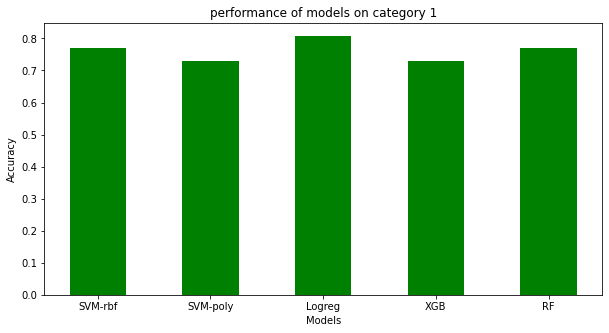

In [16]:
Acc_dict = {'SVM-rbf':A_svm ,'SVM-poly':A_svm_poly, 'Logreg':A_logreg, 'XGB':A_xgb ,'RF':A_rf}
models = list(Acc_dict.keys())
values = list(Acc_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(models, values, color ='green',
        width = 0.5)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("performance of models on category 1")
plt.show()

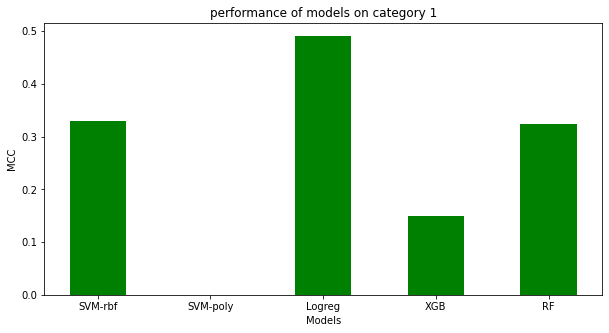

In [17]:
MCC_dict = {'SVM-rbf':MCC_svm ,'SVM-poly':MCC_svm_poly, 'Logreg':MCC_logreg, 'XGB':MCC_xgb ,'RF':MCC_rf}
models = list(MCC_dict.keys())
values = list(MCC_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(models, values, color ='green',
        width = 0.5)
plt.xlabel("Models")
plt.ylabel("MCC")
plt.title("performance of models on category 1")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X_train_1,X_test_1,y_train_2,y_test_2 = train_test_split(train_1, labels_2, test_size=0.2, random_state=0, stratify=labels_2)

In [19]:
import sklearn
from sklearn import svm
clsf = svm.SVC(kernel='rbf')
clsf.fit(X_train_1, y_train_2)
y_pred_2 = clsf.predict(X_test_1)
y_pred_2

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test_2, y_pred_2))

print("Precision:",metrics.precision_score(y_test_2, y_pred_2))
print("Recall:",metrics.recall_score(y_test_2, y_pred_2))
print('MCC', metrics.matthews_corrcoef(y_test_2, y_pred_2))
A_svm = metrics.accuracy_score(y_test_2, y_pred_2)
MCC_svm = metrics.matthews_corrcoef(y_test_2, y_pred_2)

Accuracy: 0.6923076923076923
Precision: 1.0
Recall: 0.2727272727272727
MCC 0.42174116783664994


In [21]:
import sklearn
from sklearn import svm
clsf = svm.SVC(kernel='poly')
clsf.fit(X_train_1, y_train_2)
y_pred_2_poly = clsf.predict(X_test_1)
y_pred_2_poly


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test_2, y_pred_2_poly))

print("Precision:",metrics.precision_score(y_test_2, y_pred_2_poly))
print("Recall:",metrics.recall_score(y_test_2, y_pred_2_poly))
print('MCC', metrics.matthews_corrcoef(y_test_2, y_pred_2_poly))
A_svm_poly = metrics.accuracy_score(y_test_2, y_pred_2_poly)
MCC_svm_poly = metrics.matthews_corrcoef(y_test_2, y_pred_2_poly)

Accuracy: 0.5769230769230769
Precision: 0.0
Recall: 0.0
MCC 0.0


C:\Users\Dev Panghate\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dev Panghate\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [23]:

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(X_train_1, y_train_2)
y_pred_2_logreg = logisticRegr.predict(X_test_1)
print("Accuracy:",metrics.accuracy_score(y_test_2, y_pred_2_logreg))
print("Precision:",metrics.precision_score(y_test_2, y_pred_2_logreg))
print("Recall:",metrics.recall_score(y_test_2, y_pred_2_logreg))
print('MCC', metrics.matthews_corrcoef(y_test_2, y_pred_2_logreg))
A_logreg = metrics.accuracy_score(y_test_2, y_pred_2_logreg)
MCC_logreg = metrics.matthews_corrcoef(y_test_2, y_pred_2_logreg)

Accuracy: 0.8461538461538461
Precision: 0.8888888888888888
Recall: 0.7272727272727273
MCC 0.6860232117781695


In [24]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(n_estimators=5000,n_jobs=-1,learning_rate = 0.05,reg_lambda=0.1)
classifier_xgb.fit(X_train_1,y_train_2,early_stopping_rounds=150,eval_set=[(X_test_1,y_test_2)],verbose=True)

[11:27:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.67314
[1]	validation_0-logloss:0.65306


C:\Users\Dev Panghate\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[2]	validation_0-logloss:0.62865
[3]	validation_0-logloss:0.61014
[4]	validation_0-logloss:0.59300
[5]	validation_0-logloss:0.57064
[6]	validation_0-logloss:0.56083
[7]	validation_0-logloss:0.55309
[8]	validation_0-logloss:0.54721
[9]	validation_0-logloss:0.53966
[10]	validation_0-logloss:0.53654
[11]	validation_0-logloss:0.53125
[12]	validation_0-logloss:0.52639
[13]	validation_0-logloss:0.52067
[14]	validation_0-logloss:0.51209
[15]	validation_0-logloss:0.50639
[16]	validation_0-logloss:0.50706
[17]	validation_0-logloss:0.50251
[18]	validation_0-logloss:0.50287
[19]	validation_0-logloss:0.49926
[20]	validation_0-logloss:0.49488
[21]	validation_0-logloss:0.49555
[22]	validation_0-logloss:0.48968
[23]	validation_0-logloss:0.48643
[24]	validation_0-logloss:0.48179
[25]	validation_0-logloss:0.48152
[26]	validation_0-logloss:0.48473
[27]	validation_0-logloss:0.48373
[28]	validation_0-logloss:0.48520
[29]	validation_0-logloss:0.48160
[30]	validation_0-logloss:0.48136
[31]	validation_0-logl

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=5000, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
y_pred_2_xgb = classifier_xgb.predict(X_test_1)
print("Accuracy:",metrics.accuracy_score(y_test_2, y_pred_2_xgb))
print("Precision:",metrics.precision_score(y_test_2, y_pred_2_xgb))
print("Recall:",metrics.recall_score(y_test_2, y_pred_2_xgb))
print('MCC', metrics.matthews_corrcoef(y_test_2, y_pred_2_xgb))
A_xgb = metrics.accuracy_score(y_test_2, y_pred_2_xgb)
MCC_xgb = metrics.matthews_corrcoef(y_test_2, y_pred_2_xgb)

Accuracy: 0.8461538461538461
Precision: 0.8888888888888888
Recall: 0.7272727272727273
MCC 0.6860232117781695


In [26]:
from sklearn.ensemble import RandomForestClassifier
clf_RF=RandomForestClassifier(n_estimators=2000)
clf_RF.fit(X_train_1,y_train_2)
y_pred_2_RF=clf_RF.predict(X_test_1)
print("Accuracy:",metrics.accuracy_score(y_test_2, y_pred_2_RF))
print("Precision:",metrics.precision_score(y_test_2, y_pred_2_RF))
print("Recall:",metrics.recall_score(y_test_2, y_pred_2_RF))
print('MCC', metrics.matthews_corrcoef(y_test_2, y_pred_2_RF))
A_rf = metrics.accuracy_score(y_test_2, y_pred_2_RF)
MCC_rf = metrics.matthews_corrcoef(y_test_2, y_pred_2_RF)

Accuracy: 0.7307692307692307
Precision: 0.8333333333333334
Recall: 0.45454545454545453
MCC 0.45482819489196896


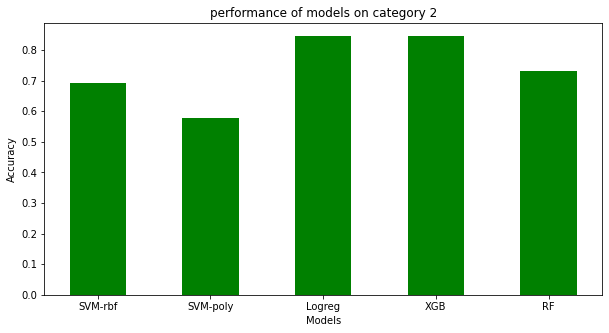

In [27]:
Acc_dict = {'SVM-rbf':A_svm ,'SVM-poly':A_svm_poly, 'Logreg':A_logreg, 'XGB':A_xgb ,'RF':A_rf}
models = list(Acc_dict.keys())
values = list(Acc_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(models, values, color ='green',
        width = 0.5)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("performance of models on category 2")
plt.show()

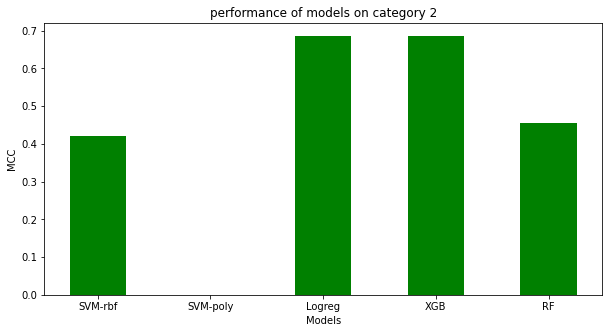

In [28]:
MCC_dict = {'SVM-rbf':MCC_svm ,'SVM-poly':MCC_svm_poly, 'Logreg':MCC_logreg, 'XGB':MCC_xgb ,'RF':MCC_rf}
models = list(MCC_dict.keys())
values = list(MCC_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(models, values, color ='green',
        width = 0.5)
plt.xlabel("Models")
plt.ylabel("MCC")
plt.title("performance of models on category 2")
plt.show()

In [29]:
test

ID_REF,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_22274,gene_22275,gene_22276,gene_22277,gene_22278,gene_22279,gene_22280,gene_22281,gene_22282,gene_22283
Test_01,12.3446,7.0781,7.5017,10.6764,6.4327,9.2305,8.1481,6.1196,4.2718,7.1375,...,8.5471,10.4398,15.7291,15.2421,3.5092,3.9866,5.9038,2.4871,6.4559,3.8567
Test_02,12.0376,7.6011,7.3458,10.5366,6.5568,9.1180,8.3105,7.1575,8.4540,6.6935,...,8.1799,10.1184,15.9040,15.4787,3.6931,3.9041,4.5131,2.0954,6.0398,1.8521
Test_03,10.9684,7.4696,8.3759,11.1175,7.0579,9.3514,8.1214,7.7247,9.9479,7.7319,...,10.6116,11.6278,16.5099,15.9230,4.9476,4.6681,6.1192,3.4668,6.3087,2.7725
Test_04,12.1004,7.9643,6.7908,10.7172,6.8571,9.1938,7.6762,6.6899,6.2971,4.7757,...,8.7040,9.8122,15.7377,15.3561,5.8020,4.0437,4.1655,1.1474,3.5803,2.8827
Test_05,11.5133,7.6576,9.9053,11.3643,7.2523,8.7346,8.3160,6.9291,9.5212,6.8443,...,9.8935,10.1678,16.5602,16.1432,5.2615,4.8368,6.6252,3.1672,4.5560,3.0307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Test_96,11.8023,7.8182,8.0532,11.2096,6.7603,10.0453,8.3714,4.8747,10.3120,7.1426,...,9.5479,10.9442,16.0837,15.6543,5.2000,4.1865,4.5330,3.1679,5.9392,3.5784
Test_97,11.4574,8.0488,8.2875,11.0754,6.8105,9.0332,8.4071,5.3538,11.2255,6.3486,...,9.6936,10.9484,16.1763,15.8729,4.3030,4.0989,3.8379,5.6705,5.8172,2.1837
Test_98,11.9181,7.3890,8.2965,10.8386,6.7350,8.9390,8.2275,5.9537,11.9945,6.1400,...,7.7356,9.9604,15.6575,15.3779,5.2125,3.8788,4.0721,4.4384,2.3209,2.6036
Test_99,11.7012,7.7375,8.5987,11.3588,7.5786,9.5624,8.5748,8.1305,6.7621,6.8786,...,8.8167,10.8120,16.4401,15.9739,5.3790,4.3518,4.8250,2.7099,4.8099,3.5340


In [30]:
scaler = preprocessing.StandardScaler().fit(test)
test_set_1 = scaler.transform(test)
test_set_1

array([[ 1.05576247, -1.20015247, -0.59099378, ..., -0.65080409,
         1.45856156,  1.04723904],
       [ 0.40600909, -0.50921916, -0.77145361, ..., -0.94321627,
         1.13386174, -1.70325868],
       [-1.85691051, -0.68294331,  0.420924  , ...,  0.08056228,
         1.34369539, -0.44038424],
       ...,
       [ 0.15309206, -0.78942366,  0.32901565, ...,  0.80588183,
        -1.76814773, -0.67213076],
       [-0.30596823, -0.32902165,  0.67882297, ..., -0.48447927,
         0.17412057,  0.60446461],
       [ 0.28304273,  0.00521569, -0.67260005, ...,  1.48887366,
         0.30599817,  1.00621346]])

In [31]:
clsf = svm.SVC(kernel='rbf')
clsf.fit(train_1, labels_1)
s1 = clsf.predict(test_set_1)


In [32]:
s2 =  clf_RF.predict(test_set_1)

In [33]:
submission  = np.concatenate((s1,s2))

In [34]:
data_2 = pd.read_csv("D:\CS5691 PRML\Data contest\Dataset_2_Training.csv")
test_set_2 = pd.read_csv("D:\CS5691 PRML\Data contest\Dataset_2_Testing.csv")
train=data_2.set_index('ID_REF').T
test=test_set_2.set_index('ID_REF').T
train_2=train.drop(["CO: 3","CO: 4","CO: 5","CO: 6"], axis=1)
labels_3 = train["CO: 3"]
labels_4 = train["CO: 4"]
labels_5 = train["CO: 5"]
labels_6 = train["CO: 6"]

In [35]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(train_2)
train_2 = scaler.transform(train_2)

In [36]:
scaler = preprocessing.StandardScaler().fit(test)
test_set_2 = scaler.transform(test)

In [37]:
from sklearn.model_selection import train_test_split
X_train_2,X_test_2,y_train_3,y_test_3 = train_test_split(train_2, labels_3, test_size=0.2, random_state=7, stratify=labels_3)

In [38]:
import sklearn
from sklearn import svm
clsf = svm.SVC(kernel='rbf')
clsf.fit(X_train_2, y_train_3)
y_pred_3 = clsf.predict(X_test_2)
y_pred_3

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test_3, y_pred_3))

print("Precision:",metrics.precision_score(y_test_3, y_pred_3))
print("Recall:",metrics.recall_score(y_test_3, y_pred_3))
print('MCC', metrics.matthews_corrcoef(y_test_3, y_pred_3))
A_svm = metrics.accuracy_score(y_test_3, y_pred_3)
MCC_svm = metrics.matthews_corrcoef(y_test_3, y_pred_3)

Accuracy: 0.75
Precision: 0.0
Recall: 0.0
MCC 0.0


C:\Users\Dev Panghate\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dev Panghate\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [40]:
import sklearn
from sklearn import svm
clsf = svm.SVC(kernel='poly')
clsf.fit(X_train_2, y_train_3)
y_pred_3_poly = clsf.predict(X_test_2)
y_pred_3_poly

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [41]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test_3, y_pred_3_poly))

print("Precision:",metrics.precision_score(y_test_3, y_pred_3_poly))
print("Recall:",metrics.recall_score(y_test_3, y_pred_3_poly))
print('MCC', metrics.matthews_corrcoef(y_test_3, y_pred_3_poly))
A_svm_poly = metrics.accuracy_score(y_test_3, y_pred_3_poly)
MCC_svm_poly = metrics.matthews_corrcoef(y_test_3, y_pred_3_poly)

Accuracy: 0.7647058823529411
Precision: 1.0
Recall: 0.058823529411764705
MCC 0.21160368475757949


In [42]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(X_train_2, y_train_3)
y_pred_3_logreg = logisticRegr.predict(X_test_2)
print("Accuracy:",metrics.accuracy_score(y_test_3, y_pred_3_logreg))
print("Precision:",metrics.precision_score(y_test_3, y_pred_3_logreg))
print("Recall:",metrics.recall_score(y_test_3, y_pred_3_logreg))
print('MCC', metrics.matthews_corrcoef(y_test_3, y_pred_3_logreg))
A_logreg = metrics.accuracy_score(y_test_3, y_pred_3_logreg)
MCC_logreg = metrics.matthews_corrcoef(y_test_3, y_pred_3_logreg)


Accuracy: 0.75
Precision: 0.5
Recall: 0.23529411764705882
MCC 0.21081851067789195


In [43]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(n_estimators=5000,n_jobs=-1,learning_rate = 0.05,reg_lambda=0.1)
classifier_xgb.fit(X_train_2,y_train_3,early_stopping_rounds=150,eval_set=[(X_test_2,y_test_3)],verbose=True)

C:\Users\Dev Panghate\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:28:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.67527
[1]	validation_0-logloss:0.65865
[2]	validation_0-logloss:0.64602
[3]	validation_0-logloss:0.63170
[4]	validation_0-logloss:0.62360
[5]	validation_0-logloss:0.61314
[6]	validation_0-logloss:0.60737
[7]	validation_0-logloss:0.59879
[8]	validation_0-logloss:0.59167
[9]	validation_0-logloss:0.58459
[10]	validation_0-logloss:0.57673
[11]	validation_0-logloss:0.57331
[12]	validation_0-logloss:0.56716
[13]	validation_0-logloss:0.56224
[14]	validation_0-logloss:0.56309
[15]	validation_0-logloss:0.55777
[16]	validation_0-logloss:0.55844
[17]	validation_0-logloss:0.55573
[18]	validation_0-logloss:0.55518
[19]	validation_0-logloss:0.55616
[20]	validation_0-lo

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=5000, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
y_pred_3_xgb = classifier_xgb.predict(X_test_2)
print("Accuracy:",metrics.accuracy_score(y_test_3, y_pred_3_xgb))
print("Precision:",metrics.precision_score(y_test_3, y_pred_3_xgb))
print("Recall:",metrics.recall_score(y_test_3, y_pred_3_xgb))
print('MCC', metrics.matthews_corrcoef(y_test_3, y_pred_3_xgb))
A_xgb = metrics.accuracy_score(y_test_3, y_pred_3_xgb)
MCC_xgb = metrics.matthews_corrcoef(y_test_3, y_pred_3_xgb)

Accuracy: 0.75
Precision: 0.5
Recall: 0.11764705882352941
MCC 0.14433756729740643


In [45]:
from sklearn.ensemble import RandomForestClassifier
clf_RF=RandomForestClassifier(n_estimators=3000)
clf_RF.fit(X_train_2,y_train_3)
y_pred_3_RF=clf_RF.predict(X_test_2)
print("Accuracy:",metrics.accuracy_score(y_test_3, y_pred_3_RF))
print("Precision:",metrics.precision_score(y_test_3, y_pred_3_RF))
print("Recall:",metrics.recall_score(y_test_3, y_pred_3_RF))
print('MCC', metrics.matthews_corrcoef(y_test_3, y_pred_3_RF))
A_rf = metrics.accuracy_score(y_test_3, y_pred_3_RF)
MCC_rf = metrics.matthews_corrcoef(y_test_3, y_pred_3_RF)

Accuracy: 0.7647058823529411
Precision: 0.6666666666666666
Recall: 0.11764705882352941
MCC 0.20672455764868075


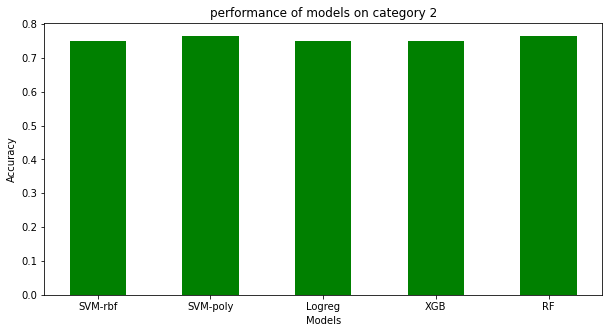

In [46]:
Acc_dict = {'SVM-rbf':A_svm ,'SVM-poly':A_svm_poly, 'Logreg':A_logreg, 'XGB':A_xgb ,'RF':A_rf}
models = list(Acc_dict.keys())
values = list(Acc_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(models, values, color ='green',
        width = 0.5)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("performance of models on category 2")
plt.show()

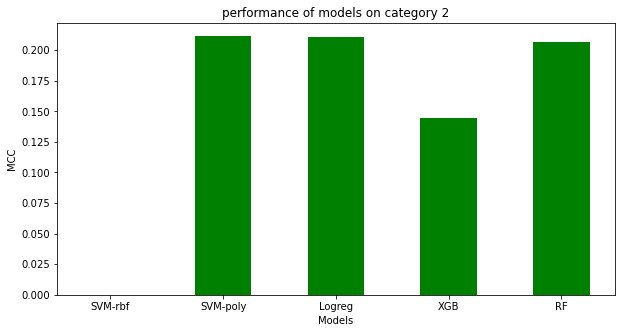

In [47]:
MCC_dict = {'SVM-rbf':MCC_svm ,'SVM-poly':MCC_svm_poly, 'Logreg':MCC_logreg, 'XGB':MCC_xgb ,'RF':MCC_rf}
models = list(MCC_dict.keys())
values = list(MCC_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(models, values, color ='green',
        width = 0.5)
plt.xlabel("Models")
plt.ylabel("MCC")
plt.title("performance of models on category 2")
plt.show()

In [48]:

s3 = clf_RF.predict(test_set_2)
submission = np.concatenate((submission,s3))


In [49]:
from sklearn.model_selection import train_test_split
X_train_2,X_test_2,y_train_4,y_test_4 = train_test_split(train_2, labels_4, test_size=0.2, random_state=42, stratify=labels_4)

In [50]:
import sklearn
from sklearn import svm
clsf = svm.SVC(kernel='rbf')
clsf.fit(X_train_2, y_train_4)
y_pred_4 = clsf.predict(X_test_2)
y_pred_4

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [51]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test_4, y_pred_4))

print("Precision:",metrics.precision_score(y_test_4, y_pred_4))
print("Recall:",metrics.recall_score(y_test_4, y_pred_4))
print('MCC', metrics.matthews_corrcoef(y_test_4, y_pred_4))
A_svm = metrics.accuracy_score(y_test_4, y_pred_4)
MCC_svm = metrics.matthews_corrcoef(y_test_4, y_pred_4)

Accuracy: 0.8529411764705882
Precision: 0.0
Recall: 0.0
MCC 0.0


C:\Users\Dev Panghate\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dev Panghate\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [52]:
import sklearn
from sklearn import svm
clsf = svm.SVC(kernel='poly')
clsf.fit(X_train_2, y_train_4)
y_pred_4_poly = clsf.predict(X_test_2)
y_pred_4_poly

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [53]:
print("Accuracy:",metrics.accuracy_score(y_test_4, y_pred_4_poly))

print("Precision:",metrics.precision_score(y_test_4, y_pred_4_poly))
print("Recall:",metrics.recall_score(y_test_4, y_pred_4_poly))
print('MCC', metrics.matthews_corrcoef(y_test_4, y_pred_4_poly))
A_svm_poly = metrics.accuracy_score(y_test_4, y_pred_4_poly)
MCC_svm_poly = metrics.matthews_corrcoef(y_test_4, y_pred_4_poly)

Accuracy: 0.8529411764705882
Precision: 0.0
Recall: 0.0
MCC 0.0


C:\Users\Dev Panghate\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dev Panghate\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [54]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(X_train_2, y_train_4)
y_pred_4_logreg = logisticRegr.predict(X_test_2)
print("Accuracy:",metrics.accuracy_score(y_test_4, y_pred_4_logreg))
print("Precision:",metrics.precision_score(y_test_4, y_pred_4_logreg))
print("Recall:",metrics.recall_score(y_test_4, y_pred_4_logreg))
print('MCC', metrics.matthews_corrcoef(y_test_4, y_pred_4_logreg))
A_logreg = metrics.accuracy_score(y_test_4, y_pred_4_logreg)
MCC_logreg = metrics.matthews_corrcoef(y_test_4, y_pred_4_logreg)

Accuracy: 0.8676470588235294
Precision: 0.6666666666666666
Recall: 0.2
MCC 0.31519154772852787


In [55]:

from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(n_estimators=5000,n_jobs=-1,learning_rate = 0.05,reg_lambda=0.1)
classifier_xgb.fit(X_train_2,y_train_4,early_stopping_rounds=150,eval_set=[(X_test_2,y_test_4)],verbose=True)

C:\Users\Dev Panghate\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:30:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.67377
[1]	validation_0-logloss:0.65594
[2]	validation_0-logloss:0.64109
[3]	validation_0-logloss:0.62686
[4]	validation_0-logloss:0.61672
[5]	validation_0-logloss:0.60742
[6]	validation_0-logloss:0.59647
[7]	validation_0-logloss:0.59279
[8]	validation_0-logloss:0.58310
[9]	validation_0-logloss:0.57763
[10]	validation_0-logloss:0.56935
[11]	validation_0-logloss:0.56197
[12]	validation_0-logloss:0.55215
[13]	validation_0-logloss:0.54605
[14]	validation_0-logloss:0.54007
[15]	validation_0-logloss:0.53227
[16]	validation_0-logloss:0.53060
[17]	validation_0-logloss:0.52984
[18]	validation_0-logloss:0.52702
[19]	validation_0-logloss:0.52286
[20]	validation_0-lo

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=5000, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
y_pred_4_xgb = classifier_xgb.predict(X_test_2)
print("Accuracy:",metrics.accuracy_score(y_test_4, y_pred_4_xgb))
print("Precision:",metrics.precision_score(y_test_4, y_pred_4_xgb))
print("Recall:",metrics.recall_score(y_test_4, y_pred_4_xgb))
print('MCC', metrics.matthews_corrcoef(y_test_4, y_pred_4_xgb))
A_xgb = metrics.accuracy_score(y_test_4, y_pred_4_xgb)
MCC_xgb = metrics.matthews_corrcoef(y_test_4, y_pred_4_xgb)


Accuracy: 0.8235294117647058
Precision: 0.0
Recall: 0.0
MCC -0.07228181235327591


In [57]:
from sklearn.ensemble import RandomForestClassifier
clf_RF=RandomForestClassifier(n_estimators=4000)
clf_RF.fit(X_train_2,y_train_4)
y_pred_4_RF=clf_RF.predict(X_test_2)
print("Accuracy:",metrics.accuracy_score(y_test_4, y_pred_4_RF))
print("Precision:",metrics.precision_score(y_test_4, y_pred_4_RF))
print("Recall:",metrics.recall_score(y_test_4, y_pred_4_RF))
print('MCC', metrics.matthews_corrcoef(y_test_4, y_pred_4_RF))
A_rf = metrics.accuracy_score(y_test_4, y_pred_4_RF)
MCC_rf = metrics.matthews_corrcoef(y_test_4, y_pred_4_RF)

Accuracy: 0.8529411764705882
Precision: 0.0
Recall: 0.0
MCC 0.0


C:\Users\Dev Panghate\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dev Panghate\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


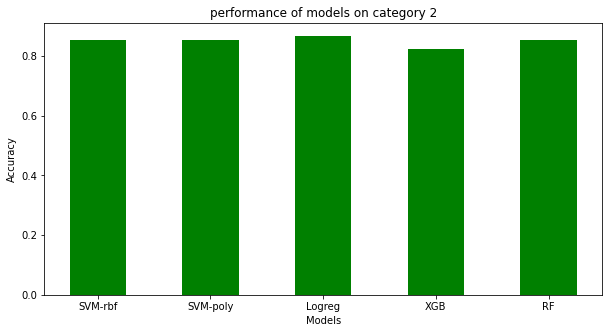

In [58]:
Acc_dict = {'SVM-rbf':A_svm ,'SVM-poly':A_svm_poly, 'Logreg':A_logreg, 'XGB':A_xgb ,'RF':A_rf}
models = list(Acc_dict.keys())
values = list(Acc_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(models, values, color ='green',
        width = 0.5)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("performance of models on category 2")
plt.show()

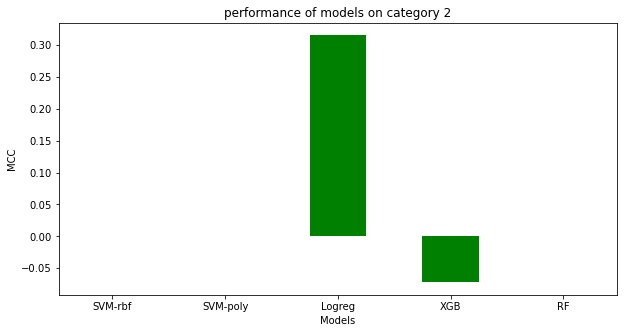

In [59]:
MCC_dict = {'SVM-rbf':MCC_svm ,'SVM-poly':MCC_svm_poly, 'Logreg':MCC_logreg, 'XGB':MCC_xgb ,'RF':MCC_rf}
models = list(MCC_dict.keys())
values = list(MCC_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(models, values, color ='green',
        width = 0.5)
plt.xlabel("Models")
plt.ylabel("MCC")
plt.title("performance of models on category 2")
plt.show()

In [60]:
s4 = logisticRegr.predict(test_set_2)
submission = np.concatenate((submission,s4))

In [61]:
from sklearn.model_selection import train_test_split
X_train_2,X_test_2,y_train_5,y_test_5 = train_test_split(train_2, labels_5, test_size=0.2, random_state=12, stratify=labels_5)

In [62]:
import sklearn
from sklearn import svm
clsf = svm.SVC(kernel='rbf')
clsf.fit(X_train_2, y_train_5)
y_pred_5 = clsf.predict(X_test_2)
y_pred_5


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [63]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test_5, y_pred_5))
print("Precision:",metrics.precision_score(y_test_5, y_pred_5))
print("Recall:",metrics.recall_score(y_test_5, y_pred_5))
print('MCC', metrics.matthews_corrcoef(y_test_5, y_pred_5))
A_svm = metrics.accuracy_score(y_test_5, y_pred_5)
MCC_svm = metrics.matthews_corrcoef(y_test_5, y_pred_5)

Accuracy: 0.5882352941176471
Precision: 1.0
Recall: 0.034482758620689655
MCC 0.14167587488869113


In [64]:
import sklearn
from sklearn import svm
clsf = svm.SVC(kernel='poly')
clsf.fit(X_train_2, y_train_5)
y_pred_5_poly = clsf.predict(X_test_2)
y_pred_5_poly

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [65]:
print("Accuracy:",metrics.accuracy_score(y_test_5, y_pred_5_poly))
print("Precision:",metrics.precision_score(y_test_5, y_pred_5_poly))
print("Recall:",metrics.recall_score(y_test_5, y_pred_5_poly))
print('MCC', metrics.matthews_corrcoef(y_test_5, y_pred_5_poly))
A_svm_poly = metrics.accuracy_score(y_test_5, y_pred_5_poly)
MCC_svm_poly = metrics.matthews_corrcoef(y_test_5, y_pred_5_poly)

Accuracy: 0.5735294117647058
Precision: 0.0
Recall: 0.0
MCC 0.0


C:\Users\Dev Panghate\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dev Panghate\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [66]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(X_train_2, y_train_5)
y_pred_5_logreg = logisticRegr.predict(X_test_2)
print("Accuracy:",metrics.accuracy_score(y_test_5, y_pred_5_logreg))
print("Precision:",metrics.precision_score(y_test_5, y_pred_5_logreg))
print("Recall:",metrics.recall_score(y_test_5, y_pred_5_logreg))
print('MCC', metrics.matthews_corrcoef(y_test_5, y_pred_5_logreg))
A_logreg = metrics.accuracy_score(y_test_5, y_pred_5_logreg)
MCC_logreg = metrics.matthews_corrcoef(y_test_5, y_pred_5_logreg)

Accuracy: 0.75
Precision: 0.8
Recall: 0.5517241379310345
MCC 0.48752489035433


In [67]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(n_estimators=5000,n_jobs=-1,learning_rate = 0.05,reg_lambda=0.1)
classifier_xgb.fit(X_train_2,y_train_5,early_stopping_rounds=150,eval_set=[(X_test_2,y_test_5)],verbose=True)

C:\Users\Dev Panghate\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:32:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.66261
[1]	validation_0-logloss:0.63347
[2]	validation_0-logloss:0.60779
[3]	validation_0-logloss:0.58771
[4]	validation_0-logloss:0.56801
[5]	validation_0-logloss:0.55003
[6]	validation_0-logloss:0.53234
[7]	validation_0-logloss:0.51422
[8]	validation_0-logloss:0.49848
[9]	validation_0-logloss:0.47818
[10]	validation_0-logloss:0.46824
[11]	validation_0-logloss:0.45522
[12]	validation_0-logloss:0.43820
[13]	validation_0-logloss:0.42825
[14]	validation_0-logloss:0.41535
[15]	validation_0-logloss:0.40539
[16]	validation_0-logloss:0.39716
[17]	validation_0-logloss:0.39104
[18]	validation_0-logloss:0.38350
[19]	validation_0-logloss:0.37821
[20]	validation_0-lo

[228]	validation_0-logloss:0.19052
[229]	validation_0-logloss:0.19052
[230]	validation_0-logloss:0.19052
[231]	validation_0-logloss:0.19052
[232]	validation_0-logloss:0.19052
[233]	validation_0-logloss:0.19052
[234]	validation_0-logloss:0.19052
[235]	validation_0-logloss:0.19052
[236]	validation_0-logloss:0.19052
[237]	validation_0-logloss:0.19052
[238]	validation_0-logloss:0.19052
[239]	validation_0-logloss:0.19052
[240]	validation_0-logloss:0.19051
[241]	validation_0-logloss:0.19051
[242]	validation_0-logloss:0.19051
[243]	validation_0-logloss:0.19051
[244]	validation_0-logloss:0.19051
[245]	validation_0-logloss:0.19051
[246]	validation_0-logloss:0.19051
[247]	validation_0-logloss:0.19051
[248]	validation_0-logloss:0.19051
[249]	validation_0-logloss:0.19051
[250]	validation_0-logloss:0.19051
[251]	validation_0-logloss:0.19051
[252]	validation_0-logloss:0.19051
[253]	validation_0-logloss:0.19051
[254]	validation_0-logloss:0.19051
[255]	validation_0-logloss:0.19051
[256]	validation_0-l

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=5000, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
y_pred_5_xgb = classifier_xgb.predict(X_test_2)
print("Accuracy:",metrics.accuracy_score(y_test_5, y_pred_5_xgb))
print("Precision:",metrics.precision_score(y_test_5, y_pred_5_xgb))
print("Recall:",metrics.recall_score(y_test_5, y_pred_5_xgb))
print('MCC', metrics.matthews_corrcoef(y_test_5, y_pred_5_xgb))
A_xgb = metrics.accuracy_score(y_test_5, y_pred_5_xgb)
MCC_xgb = metrics.matthews_corrcoef(y_test_5, y_pred_5_xgb)

Accuracy: 0.9264705882352942
Precision: 0.8529411764705882
Recall: 1.0
MCC 0.8623164985025762


In [69]:
from sklearn.ensemble import RandomForestClassifier
clf_RF=RandomForestClassifier(n_estimators=3000)
clf_RF.fit(X_train_2,y_train_5)
y_pred_5_RF=clf_RF.predict(X_test_2)
print("Accuracy:",metrics.accuracy_score(y_test_5, y_pred_5_RF))
print("Precision:",metrics.precision_score(y_test_5, y_pred_5_RF))
print("Recall:",metrics.recall_score(y_test_5, y_pred_5_RF))
print('MCC', metrics.matthews_corrcoef(y_test_5, y_pred_5_RF))
A_rf = metrics.accuracy_score(y_test_5, y_pred_5_RF)
MCC_rf = metrics.matthews_corrcoef(y_test_5, y_pred_5_RF)

Accuracy: 0.8529411764705882
Precision: 0.8518518518518519
Recall: 0.7931034482758621
MCC 0.6979847290767082


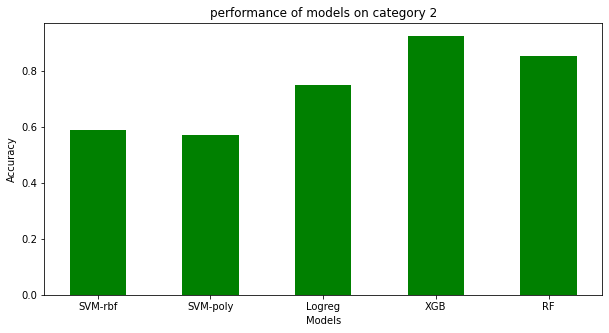

In [70]:
Acc_dict = {'SVM-rbf':A_svm ,'SVM-poly':A_svm_poly, 'Logreg':A_logreg, 'XGB':A_xgb ,'RF':A_rf}
models = list(Acc_dict.keys())
values = list(Acc_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(models, values, color ='green',
        width = 0.5)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("performance of models on category 2")
plt.show()

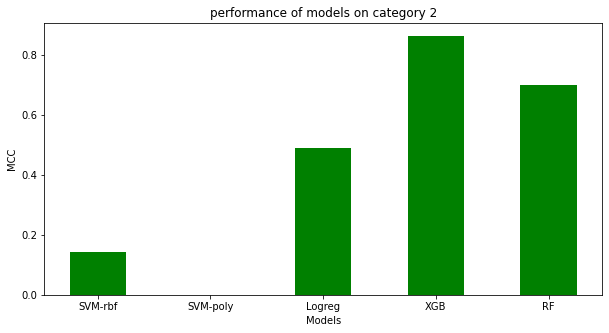

In [71]:
MCC_dict = {'SVM-rbf':MCC_svm ,'SVM-poly':MCC_svm_poly, 'Logreg':MCC_logreg, 'XGB':MCC_xgb ,'RF':MCC_rf}
models = list(MCC_dict.keys())
values = list(MCC_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(models, values, color ='green',
        width = 0.5)
plt.xlabel("Models")
plt.ylabel("MCC")
plt.title("performance of models on category 2")
plt.show()

In [72]:
s5 = classifier_xgb.predict(test_set_2)
submission = np.concatenate((submission,s5))

In [73]:
from sklearn.model_selection import train_test_split
X_train_2,X_test_2,y_train_6,y_test_6 = train_test_split(train_2, labels_6, test_size=0.2, random_state=20, stratify=labels_6)

In [74]:
import sklearn
from sklearn import svm
clsf = svm.SVC(kernel='rbf')
clsf.fit(X_train_2, y_train_6)
y_pred_6 = clsf.predict(X_test_2)
y_pred_6


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [75]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test_6, y_pred_6))
print("Precision:",metrics.precision_score(y_test_6, y_pred_6))
print("Recall:",metrics.recall_score(y_test_6, y_pred_6))
print('MCC', metrics.matthews_corrcoef(y_test_6, y_pred_6))
A_svm = metrics.accuracy_score(y_test_6, y_pred_6)
MCC_svm = metrics.matthews_corrcoef(y_test_6, y_pred_6)

Accuracy: 0.5882352941176471
Precision: 0.5882352941176471
Recall: 1.0
MCC 0.0


C:\Users\Dev Panghate\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [76]:
import sklearn
from sklearn import svm
clsf = svm.SVC(kernel='poly')
clsf.fit(X_train_2, y_train_6)
y_pred_6_poly = clsf.predict(X_test_2)
y_pred_6_poly


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [77]:
print("Accuracy:",metrics.accuracy_score(y_test_6, y_pred_6_poly))
print("Precision:",metrics.precision_score(y_test_6, y_pred_6_poly))
print("Recall:",metrics.recall_score(y_test_6, y_pred_6_poly))
print('MCC', metrics.matthews_corrcoef(y_test_6, y_pred_6_poly))
A_svm_poly = metrics.accuracy_score(y_test_6, y_pred_6_poly)
MCC_svm_poly = metrics.matthews_corrcoef(y_test_6, y_pred_6_poly)

Accuracy: 0.5882352941176471
Precision: 0.5882352941176471
Recall: 1.0
MCC 0.0


C:\Users\Dev Panghate\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [78]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(X_train_2, y_train_6)
y_pred_6_logreg = logisticRegr.predict(X_test_2)
print(y_pred_6_logreg)
print("Accuracy:",metrics.accuracy_score(y_test_6, y_pred_6_logreg))
print("Precision:",metrics.precision_score(y_test_6, y_pred_6_logreg))
print("Recall:",metrics.recall_score(y_test_6, y_pred_6_logreg))
print('MCC', metrics.matthews_corrcoef(y_test_6, y_pred_6_logreg))
A_logreg = metrics.accuracy_score(y_test_6, y_pred_6_logreg)
MCC_logreg = metrics.matthews_corrcoef(y_test_6, y_pred_6_logreg)

[1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
Accuracy: 0.6911764705882353
Precision: 0.7021276595744681
Recall: 0.825
MCC 0.3462053668393498


In [79]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(n_estimators=5000,n_jobs=-1,learning_rate = 0.05,reg_lambda=0.1)
classifier_xgb.fit(X_train_2,y_train_6,early_stopping_rounds=150,eval_set=[(X_test_2,y_test_6)],verbose=True)

C:\Users\Dev Panghate\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:33:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.69332
[1]	validation_0-logloss:0.68826
[2]	validation_0-logloss:0.68703
[3]	validation_0-logloss:0.68793
[4]	validation_0-logloss:0.68683
[5]	validation_0-logloss:0.68880
[6]	validation_0-logloss:0.68970
[7]	validation_0-logloss:0.69020
[8]	validation_0-logloss:0.69526
[9]	validation_0-logloss:0.69781
[10]	validation_0-logloss:0.70208
[11]	validation_0-logloss:0.70520
[12]	validation_0-logloss:0.69854
[13]	validation_0-logloss:0.69284
[14]	validation_0-logloss:0.69429
[15]	validation_0-logloss:0.69402
[16]	validation_0-logloss:0.69189
[17]	validation_0-logloss:0.69880
[18]	validation_0-logloss:0.70043
[19]	validation_0-logloss:0.70192
[20]	validation_0-lo

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=5000, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
y_pred_6_xgb = classifier_xgb.predict(X_test_2)
print("Accuracy:",metrics.accuracy_score(y_test_6, y_pred_6_xgb))
print("Precision:",metrics.precision_score(y_test_6, y_pred_6_xgb))
print("Recall:",metrics.recall_score(y_test_6, y_pred_6_xgb))
print('MCC', metrics.matthews_corrcoef(y_test_6, y_pred_6_xgb))
A_xgb = metrics.accuracy_score(y_test_6, y_pred_6_xgb)
MCC_xgb = metrics.matthews_corrcoef(y_test_6, y_pred_6_xgb)

Accuracy: 0.5294117647058824
Precision: 0.58
Recall: 0.725
MCC -0.027888667551135855


In [81]:
from sklearn.ensemble import RandomForestClassifier
clf_RF=RandomForestClassifier(n_estimators=3000)
clf_RF.fit(X_train_2,y_train_6)
y_pred_6_RF=clf_RF.predict(X_test_2)
print("Accuracy:",metrics.accuracy_score(y_test_6, y_pred_6_RF))
print("Precision:",metrics.precision_score(y_test_6, y_pred_6_RF))
print("Recall:",metrics.recall_score(y_test_6, y_pred_6_RF))
print('MCC', metrics.matthews_corrcoef(y_test_6, y_pred_6_RF))
A_rf = metrics.accuracy_score(y_test_6, y_pred_6_RF)
MCC_rf = metrics.matthews_corrcoef(y_test_6, y_pred_6_RF)

Accuracy: 0.6176470588235294
Precision: 0.6166666666666667
Recall: 0.925
MCC 0.1582079704210945


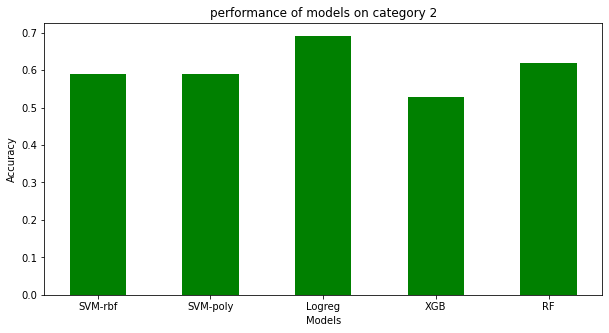

In [82]:
Acc_dict = {'SVM-rbf':A_svm ,'SVM-poly':A_svm_poly, 'Logreg':A_logreg, 'XGB':A_xgb ,'RF':A_rf}
models = list(Acc_dict.keys())
values = list(Acc_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(models, values, color ='green',
        width = 0.5)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("performance of models on category 2")
plt.show()

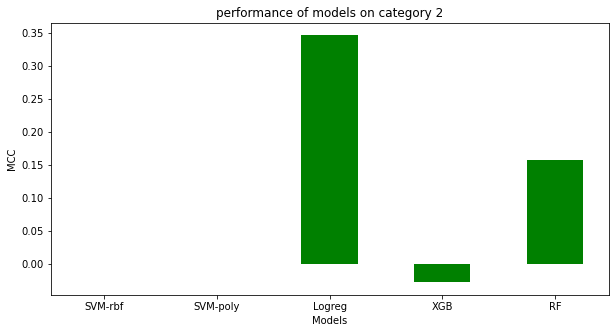

In [83]:
MCC_dict = {'SVM-rbf':MCC_svm ,'SVM-poly':MCC_svm_poly, 'Logreg':MCC_logreg, 'XGB':MCC_xgb ,'RF':MCC_rf}
models = list(MCC_dict.keys())
values = list(MCC_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(models, values, color ='green',
        width = 0.5)
plt.xlabel("Models")
plt.ylabel("MCC")
plt.title("performance of models on category 2")
plt.show()

In [84]:
clsf = svm.SVC(kernel='rbf')
clsf.fit(train_2, labels_6)
s6 = clsf.predict(test_set_2)
submission = np.concatenate((submission,s6))

In [85]:
submission = pd.DataFrame(submission,columns=['Predicted'])
submission.index.name = 'Id'



In [86]:
submission['Predicted'] = submission['Predicted'].astype(int)

In [87]:
submission.to_csv('MM19B059_NA19B040_pred.csv')